#Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#Reading and Exploring the Data

In [62]:
df = pd.read_csv('housing.csv')

In [63]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


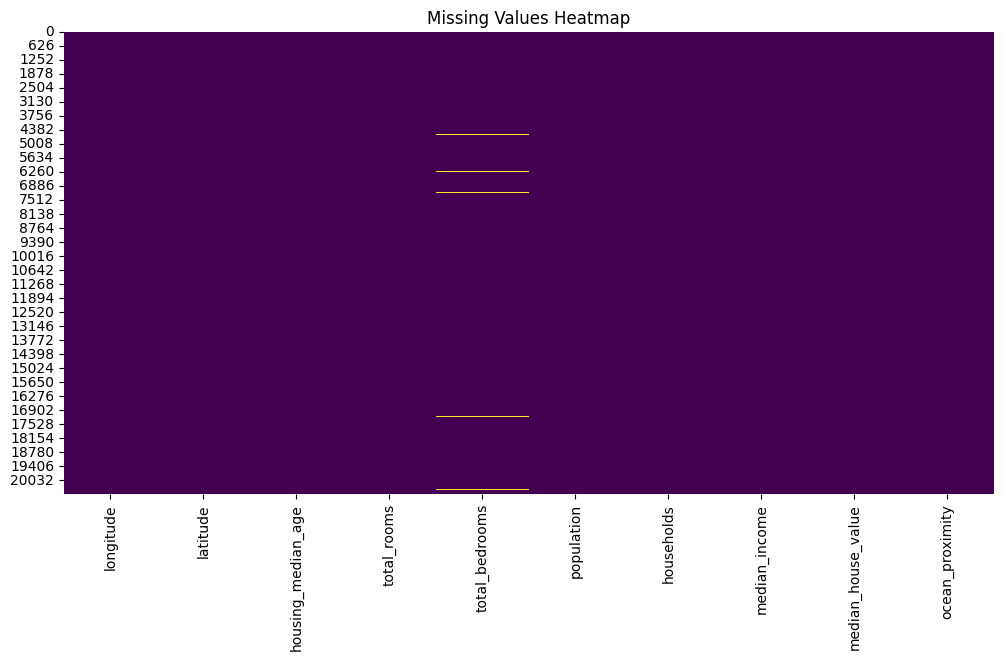

In [64]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

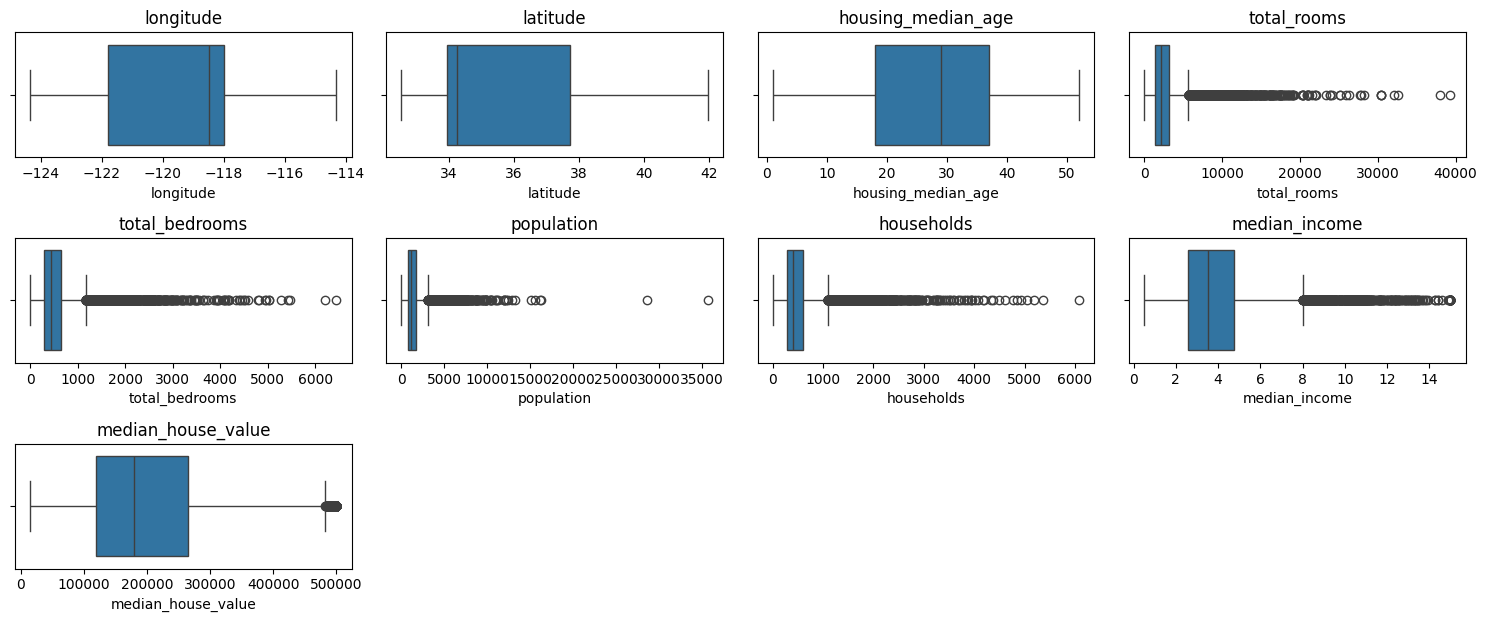

In [65]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

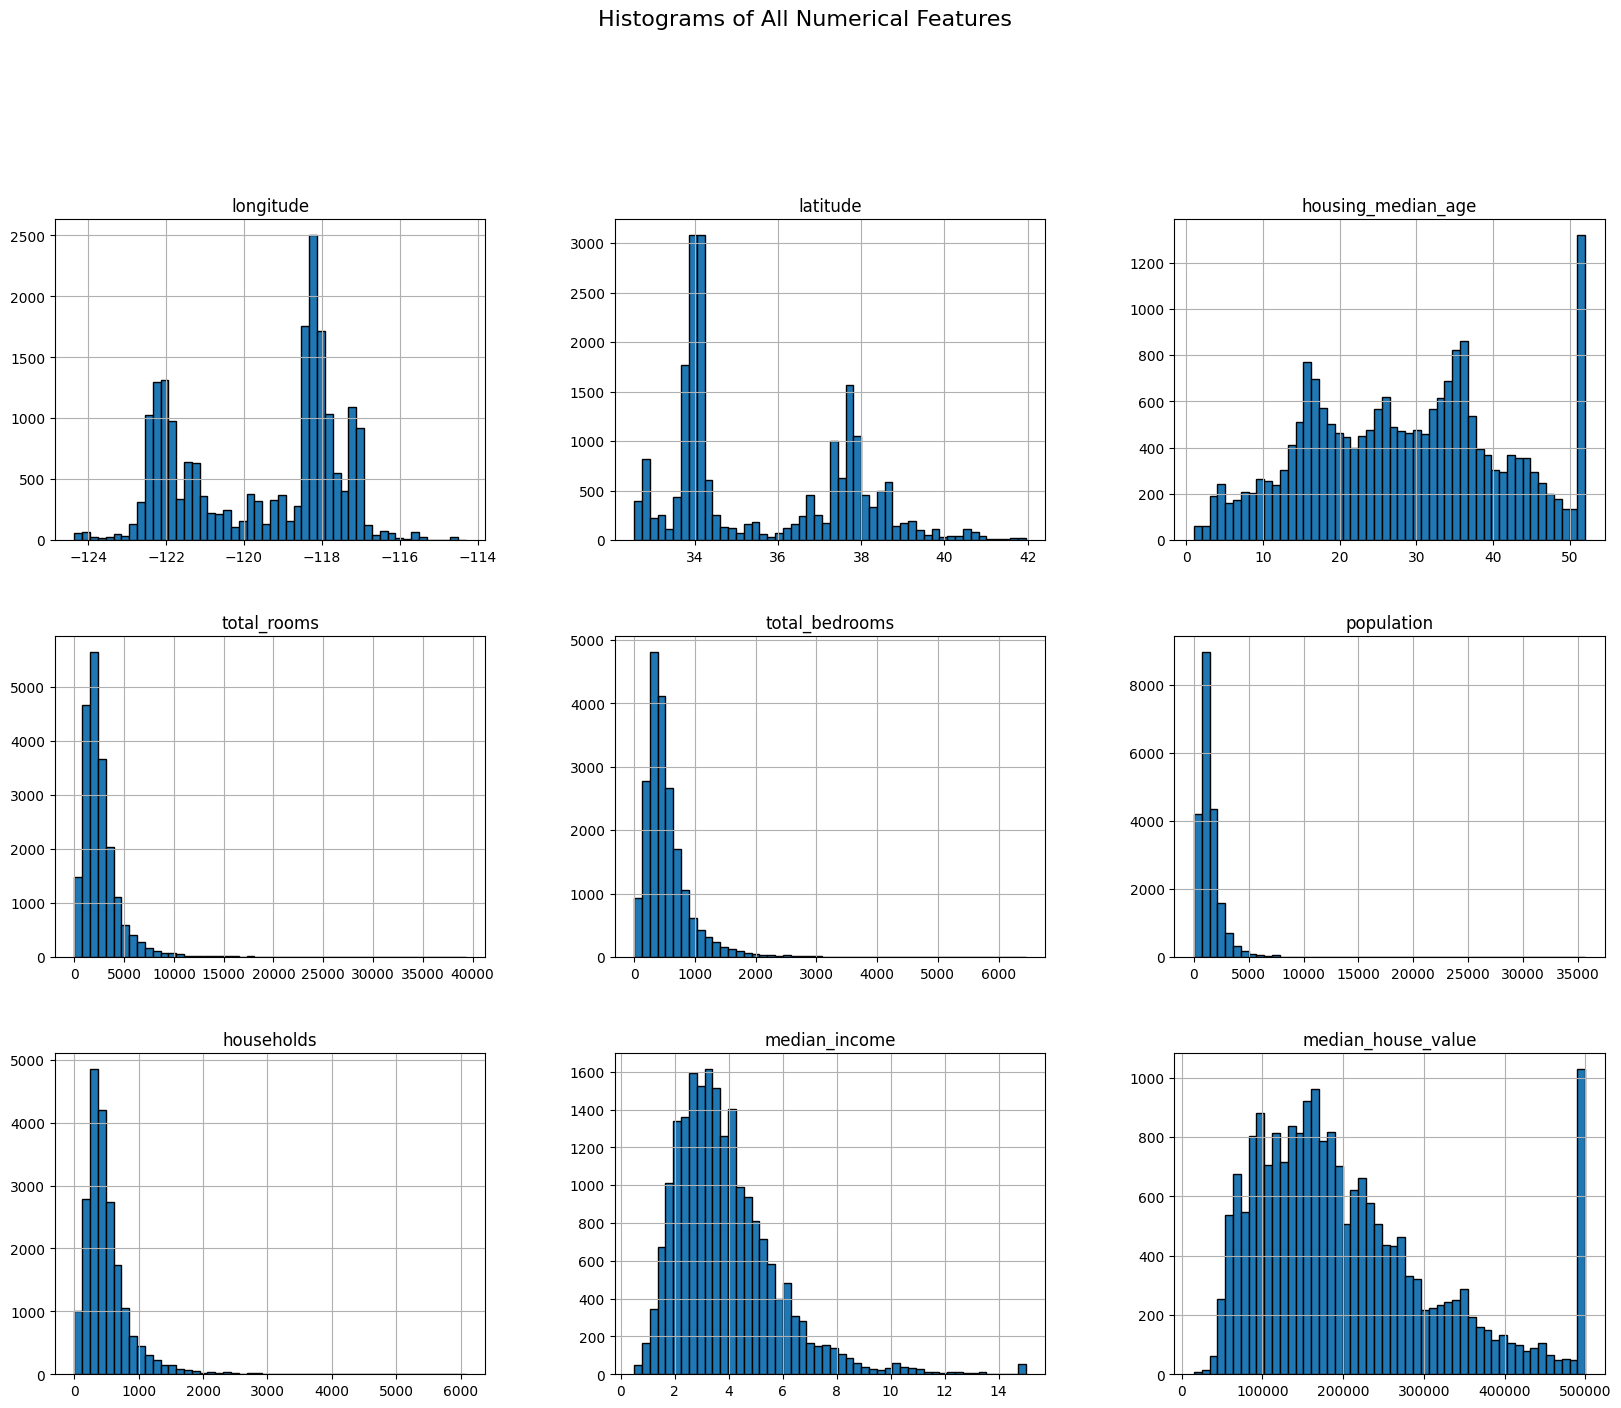

In [66]:
df.drop('ocean_proximity', axis=1).hist(bins=50, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of All Numerical Features', y=1.02, fontsize=16)
plt.show()

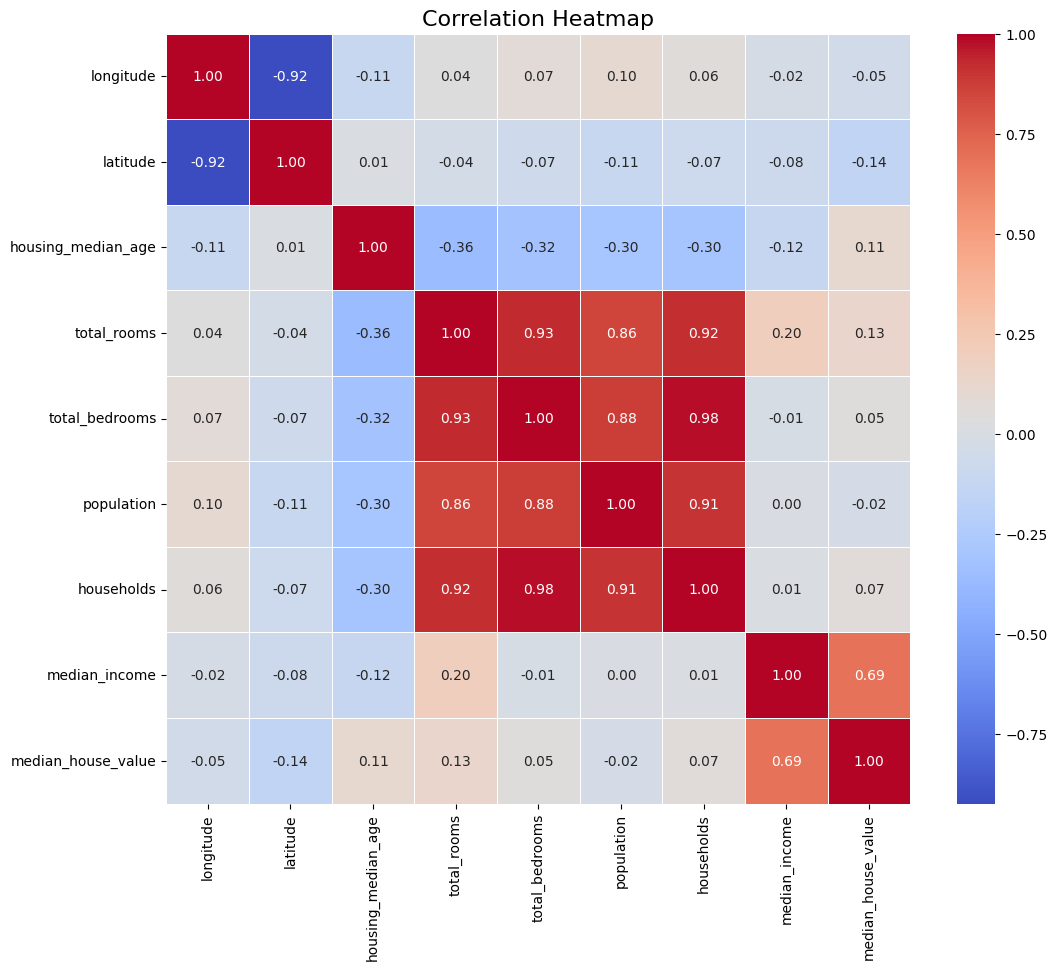

In [67]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#Handling Nulls and Outliers

In [68]:
df.dropna(inplace=True)

In [69]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [70]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [71]:
df.duplicated().sum()

np.int64(0)

Encoding

In [72]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [73]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if(col == 'median_house_value'):
        continue
    upper_limit = df[col].quantile(0.95)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

df[numerical_cols].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.592079,35.585844,28.633094,2470.598248,508.230549,1344.545089,472.501150,3.772060,206864.413155
std,1.969888,2.042614,12.591805,1467.975565,300.972793,784.769392,274.086086,1.587505,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-117.080000,38.960000,52.000000,6217.000000,1275.400000,3284.400000,1159.000000,7.300340,500001.000000


#Modeling

Splitting the Data

In [74]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Mean Squared Error:", mse)
print("Linear Regression R-squared:", r2)

Linear Regression Mean Squared Error: 4819663594.362251
Linear Regression R-squared: 0.6475612520399561


Polyregression Model

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Mean Squared Error:", mse_poly)
print("Polynomial Regression R-squared:", r2_poly)

Polynomial Regression Mean Squared Error: 3494370086.8086777
Polynomial Regression R-squared: 0.7444735728558993


Random forest Model

In [77]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=50,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_test_pred)
r2_rf = r2_score(y_test, y_test_pred)

print(f"Random Forest Mean Squared Error: {mse_rf:.4f}")
print(f"Random Forest R-squared: {r2_rf:.4f}")


Random Forest Mean Squared Error: 2404095788.1752
Random Forest R-squared: 0.8242
